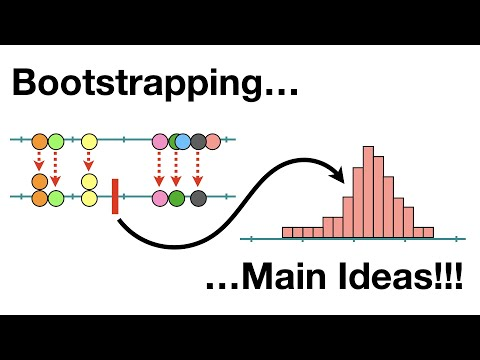

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

1.
Standard Deviation measures the amount of variation of variables in a dataset about its mean. Standard Error of the Mean, on the other hand measures the dispersion of sample means around the population mean when multiple samples are taken from a population. 
Standard Deviation is to understand how spread out individual data points are related to the population mean. Standard Error of the Mean is used to assess how well the sample mean estimates the population mean.

2.
Step 1: Calculate the Sample Mean
Step 2: Calculate the Standard Deviation
Step 3: Calculate the Standard Error of the Mean = Standard Deviation / sqrt(n) (n = number of observations)
Step 4: Determine the Z-Score for 95% confidence, which is approx. 1.96
Step 5: Calculate the Margin of Error = Z * Standard Error of the Mean
Step 6: Calculate the Confidence Interval = (Sample Mean - Margin of Error, Sample Mean + Margin of Error)

3.
Step 1: Resample the original dataset and repeat 10,000 times to create a distribution of bootstrapped means
Step 2: Calculate bootstrapped means
Step 3: Sort bootstrapped means in ascending order
Step 4: Determine the confidence interval (lower bound: 2.5th percentile, upper bound: 97.5th percentile)

4.

In [2]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Step 1: Create a sample dataset
sample_size = 30 #Number of datapoints: 30
original_data = np.random.normal(loc=50, scale=10, size=sample_size)  # Normal distribution (loc: mean, scale: std)

# Step 2: Define the number of bootstrap iterations
num_iterations = 10000 #Resample for 10,000 times
bootstrapped_means = [] #Create list to store bootstrapped means

# Step 3: Perform bootstrapping
for _ in range(num_iterations):
    # Create a bootstrap sample with replacement
    bootstrap_sample = np.random.choice(original_data, size=sample_size, replace=True) #Resample: 30 data points, allow repeated datapoints (replace = True will place data points back after they are taken)
    # Calculate the mean of the bootstrap sample
    bootstrapped_means.append(np.mean(bootstrap_sample)) #Calculate bootstrap mean and add to the list

# Step 4: Calculate the 95% confidence interval
lower_bound = np.percentile(bootstrapped_means, 2.5) #Lower bound: 2.5th percentile
upper_bound = np.percentile(bootstrapped_means, 97.5) #Upper bound: 97.5th percentile

# Step 5: Output results
print(f"Original Data: {original_data}")
print(f"Bootstrapped Means: {bootstrapped_means[:5]}... (showing first 5 means)")
print(f"95% Confidence Interval for the Population Mean: ({lower_bound:.2f}, {upper_bound:.2f})")

Original Data: [54.96714153 48.61735699 56.47688538 65.23029856 47.65846625 47.65863043
 65.79212816 57.67434729 45.30525614 55.42560044 45.36582307 45.34270246
 52.41962272 30.86719755 32.75082167 44.37712471 39.8716888  53.14247333
 40.91975924 35.87696299 64.65648769 47.742237   50.67528205 35.75251814
 44.55617275 51.1092259  38.49006423 53.75698018 43.9936131  47.0830625 ]
Bootstrapped Means: [49.813400160572925, 48.220565263289785, 50.443449507211696, 47.19640533443397, 50.47093991849341]... (showing first 5 means)
95% Confidence Interval for the Population Mean: (44.96, 51.30)


Chat log:
Summary of Bootstrapped Confidence Interval Calculation
In our exchange, we discussed how to calculate a 95% confidence interval for the population mean using a bootstrapping approach with a generated dataset. Here's a concise summary of the steps involved:

Creating the Sample Dataset:

We generated a sample dataset consisting of 30 data points drawn from a normal distribution with a mean of 50 and a standard deviation of 10.
Defining Bootstrapping Parameters:

We decided to perform 10,000 bootstrap iterations to create a robust distribution of means.
Bootstrapping Process:

In each iteration, we randomly sampled (with replacement) 30 data points from the original dataset.
We calculated the mean of each bootstrapped sample and stored these means in a list.
Calculating the Confidence Interval:

We determined the lower and upper bounds of the 95% confidence interval by calculating the 2.5th and 97.5th percentiles of the distribution of bootstrapped means.
Results:

The original dataset and the first five bootstrapped means were printed for reference.
The final output was the 95% confidence interval for the population mean, indicating the range in which we can be 95% confident that the true population mean lies.
This bootstrapping method provides a non-parametric way to estimate confidence intervals, making it particularly useful when the data does not meet normality assumptions or when the sample size is small.

5.
A population parameter describes the entire population and is fixed, whereas a sample statistic describes a subset of the population and can vary depending on different samples taken.
1) Confidence intervals constructed around sample statistics is to provide a range within which the true population parameter is likely to lie. 
2) Sample statistics vary from sample to sample because they are calculated from a subset of the population. The confidence interval is what quantifies the uncertainty associated with using a sample statistic to estimate a population parameter. Sample statistics can never perfectly resemble the entire population, and the confidence interval is what allowed us to express this variability and uncertainty in our estimates.
3) The goal of inferential statistics is to make inferences about a population based on a sample, since most of the time the entire population is too large to work with. Confidence intervals, as an estimate for a population parameter gives us a tool to generalize our findings from the sample to the larger population with a quantified level of confidence. 

Chat log:
In our discussion, we explored the difference between population parameters and sample statistics. A population parameter is a fixed, often unknown value that describes a characteristic of the entire population, such as the population mean or population proportion. In contrast, a sample statistic is a measurable value derived from a subset of the population, like the sample mean or sample proportion, which varies depending on the sample taken.

The distinction between population parameters and sample statistics is important, especially when constructing confidence intervals. Confidence intervals use sample statistics to estimate a range within which the true population parameter is likely to fall. Recognizing this difference is key to interpreting confidence intervals correctly, as they quantify the uncertainty in using a sample to estimate the unknown population parameter. This understanding allows for proper generalization of findings from the sample to the population, acknowledging the inherent variability in sampling.

6.
1. 
Here is a list of steps of bootstrapping:
Step 1: Resampling with replacement (replacement means that the same data point can be taken multiple times in one iteration of resampling), do this for large amount of iterations (e.g. 1000, 10000 times) to ensure a good approximation of the sampling distribution
Step 2: Calculate the required statistic of interest (e.g. mean, median, std, regression, etc.) for each sample
Step 3: Estimate the sampling distribution from the conglomeration of all samples. The collection of statistics calculated from all the bootstrap samples forms an empirical distribution, which predicts the sampling distribution of the statistic.
2.
Bootstrapping is a statistical method that involves resampling with replacement from the original dataset to estimate the sampling distribution of the dataset. it is commonly used when it is difficult to derive the theoretical distribution directly from the original dataset. Some specific usages may include:
- Providing an empirical way to estimate the variability of a dataset (How much the datapoints differ from each other and from the central points of the dataset, common measures include range, variance, std, etc.)
- Construct confidence intervals
- Assessing bias of a statistic (difference between expected value of that statistic and the true value of the parameter) by comparing the mean of the bootstrap estimates to the observed sample statistics
- Conduct hypothesis testing, especially when the distribution of the original statistic is unknonwn (hypothesis testing is a statistical method used to make infereces about a population based on sample data, which involes formulating two competing hypotheses and use sample datas to determine which hypothesis is more likely to be true) 
3.
The first step is to state your hypotheses. You should include a Null Hypothesis which is equal to your desired value, and your objective is to either prove it right or reject it. Then you need to resample the original dataset with replacements to create bootstrap samples. Calculate the mean of the bootstrap sample and plot them into a histogram (x axis: bootstrapped mean, y axis: frequency). After that, find the 95% confidence interval of the bootstrap means and see if your null hypothesis is included in the interval. If it is, then you have proved your null hypothesis' plausibility, while if it isn't, then you have successfully rejected your hypothesis.

7.
1. The null hypothesis in such tests suggests that the true parameter is equal to zero (no effect). When constructing a confidence interval, we are assessing a range of plausible values for the population parameter. If zero lies within this interval, that means the actual population parameter could be zero. This means that there isn't enough evidence to prove that the parameter is significantly different from zero.
2. In order to reject the null hypothesis, the constructed confidence interval must not include the null hypothesis value (often zero). If zero is not included in the interval, it means that zero is not a plausible value for the population parameter, hence no effect is very unlikely to be the actual parameter. Such result provides evidence that the true population parameter is very likely to be significantly different from zero, therefore we would reject the null hypothesis.

8.
1. A Null hypothesis of no effect in this case means no change in health score, hence the vacccine is ineffective.
2. The plan: Resample with replacement 10,000 times and find the bootstrap sample mean of the data. Create a histogram of the mean and find the 95% confidence interval.

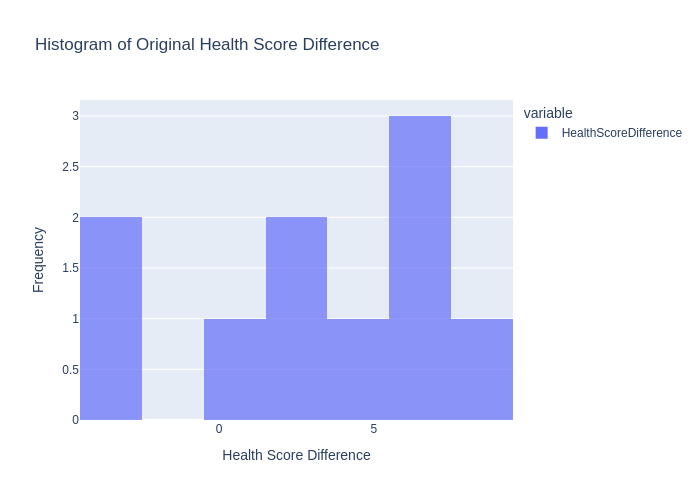

In [16]:
import numpy as np
import pandas as pd
import plotly.express as px

# Original data
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)

# Adding a column for the difference between InitialHealthScore and FinalHealthScore
df['HealthScoreDifference'] = df['FinalHealthScore'] - df['InitialHealthScore']

df

# Creating the histogram for the original health score difference
fig = px.histogram(df['HealthScoreDifference'], nbins=10, title='Histogram of Original Health Score Difference',
                   labels={'value': 'Health Score Difference'}, opacity=0.7)
fig.update_layout(xaxis_title='Health Score Difference', yaxis_title='Frequency')
fig.show(renderer='png')

[0.8 5.5]


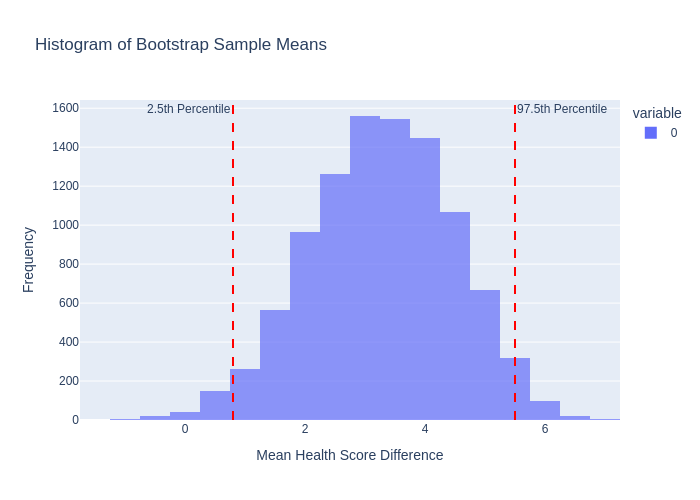

In [18]:
# Creating 10,000 bootstrap samples for the mean of the difference between initial health score and final health score
bootstrap_samples = [df['HealthScoreDifference'].sample(n=len(df), replace=True) for _ in range(10000)]

#Calculate the mean of each bootstrap sample 
bootstrap_means = [sample.mean() for sample in bootstrap_samples]

#Find the 95% confidence interval of the sample means
conf_interval = np.percentile(bootstrap_means, [2.5, 97.5])
print(conf_interval)

# Creating the histogram with Plotly
fig = px.histogram(bootstrap_means, nbins=20, title='Histogram of Bootstrap Sample Means',
                   labels={'value': 'Mean Health Score Difference'}, opacity=0.7)

# Adding lines for the 95% confidence interval
fig.add_vline(x=conf_interval[0], line_dash="dash", line_color="red", annotation_text="2.5th Percentile", annotation_position="top left")
fig.add_vline(x=conf_interval[1], line_dash="dash", line_color="red", annotation_text="97.5th Percentile", annotation_position="top right")

# Add title to the x and y axis
fig.update_layout(xaxis_title='Mean Health Score Difference', yaxis_title='Frequency')
fig.show(renderer='png')

As we can see from the histogram, the 95% confidence interval of the mean of the health score difference lies within [0.8, 5,5]. Therefore, zero is not a plausible value of the actual parameter and we can reject the Null Hypothesis. Since the actual parameter has only positive plausible value, we can conlude that the vaccine is effective. 

Further thoughts:
The vaccine may have different effect on person of different age and gender. More bootstrapping sessions focused on specific age group and gender can help us figure out whether the vaccine is effective on different people.

Chat logs:
1. https://chatgpt.com/share/66ff86a3-3dcc-8001-96ff-a55466457482
2. https://chatgpt.com/share/66ff86cb-8010-8001-9ad1-fdb4395c9357
3. https://chatgpt.com/share/66ff86d6-242c-8001-824f-91b5424fa169
4. https://chatgpt.com/share/66ff86e0-13dc-8001-96a2-a71605bb421e
5. https://chatgpt.com/share/66ff86e9-3e4c-8001-bcb3-ae9f915b91de